# World population linear fitting - constant growth

#### Group id: CMaS02

#### Member:
- Nguyen Hoang An
- Trinh The Vinh
- Ngo Phuong Nam

### Exercise 1: Read world population data from 1951 to 2020 from this Wikipedia page: https://en.wikipedia.org/wiki/World_population

In [65]:
from pandas import read_html
import pandas as pd
filename = 'World_population.html'
tables = read_html(filename,
                   header=0,
                   index_col=0,
                   decimal='M')
#get table 7:
table7 = tables[7]

In [66]:
data = table7[table7.columns[:3]][1:]
data["Yearly growth"] = data["Yearly growth"].str.replace("%","")
data.columns = ["population","percent growth","number growth"]
data['population']=pd.to_numeric(data['population'])
data['percent growth']=pd.to_numeric(data['percent growth'])
data

,population,percent growth,number growth
Year,,,
1951,2584034261,1.88,47603112
1952,2630861562,1.81,46827301
1953,2677608960,1.78,46747398
1954,2724846741,1.76,47237781
1955,2773019936,1.77,48173195
...,...,...,...
2016,7464022000,1.14,84225000
2017,7547859000,1.12,83837000
2018,7631091000,1.10,83232000


### Exercise 2: Determine the closed-form mathematical expressions of the following lines
1. The line connecting the pair of world population numbers corresponding to 1951 and 2020.
2. The line connecting the pair of world population numbers corresponding to 1970 and 2020.
3. [Optional] The line that results the minimum MSE (Minimum Mean Squared Errors - MMSE)

Input: {xn, yn} with xn = year index; yn = world population at year xn
The line connecting the pair of 2 point:
y = ax + b, with a is slope: (y2-y1)/(x2-x1); b = y - ax, is the intersection between y and Oy

In [67]:
a_1 = (data['population'][-1]-data['population'][0])/(2020-1951)
b_1 = data['population'][-1] - a_1*2020
print("The line connecting the pair of world population numbers corresponding to 1951 and 2020:\n y ~= "+ str(int(a_1)) +"x + "+ str(int(b_1)))

The line connecting the pair of world population numbers corresponding to 1951 and 2020:
 y ~= 75521242x + -144757910040


In [68]:
a_2 = (data['population'][-1]-data['population'][19])/(2020-1970) # the position of 1970 is 1970-1951 = 19
b_2 = data['population'][-1] - a_2*2020
print("The line connecting the pair of world population numbers corresponding to 1970 and 2020:\n y ~= "+ str(int(a_2)) +"x + "+ str(int(b_2)))

The line connecting the pair of world population numbers corresponding to 1970 and 2020:
 y ~= 81891259x + -157625343341


Input: {xn, yn}  with xn = year index; yn = world population at year xn

Output: Closed-form mathematical expressions:
>y = f(x) = ax + b

We find closed-form when minimize MSE

After taking the first derivative of MSE with regard to a and b, to find min of a, b. We will find a = Da/D ; b = Db/D

In [69]:
def line_connecting(data_table, year):
    begin_year = year[0]
    last_year = year[1] + 1
    N = len(data_table)
    #We define some variable for notational convenience
    Cx = 1/N * sum(range(begin_year, last_year))
    Cy = 1/N * sum([population for population in data_table['population']])
    Cxx = 1/N * sum([year**2 for year in range(begin_year, last_year)])
    Cxy = 1/N * sum([year*population for year, population in zip(range(begin_year, last_year), data_table['population'])])

    a=(Cxy-Cx*Cy)/(Cxx-Cx**2)
    b=(Cxx*Cy-Cxy*Cx)/(Cxx-Cx**2)
    return([a,b])

a_1951 = line_connecting(data,[1951,2020])[0]
b_1951 = line_connecting(data,[1951,2020])[1]
print("The line that results the minimum MSE from 1951 to 2020:\n y ~= "+ str(int(a_1951)) +"x + "+ str(int(b_1951)))

The line that results the minimum MSE from 1951 to 2020:
 y ~= 78243263x + -150349987838


In [70]:
#Get data from 1970 to 2020
data_1970 = data[19:]
data_1970

,population,percent growth,number growth
Year,,,
1970,3700437046,2.06,74756419
1971,3775759617,2.04,75322571
1972,3851650245,2.01,75890628
1973,3927780238,1.98,76129993
1974,4003794172,1.94,76013934
1975,4079480606,1.89,75686434
1976,4154666864,1.84,75186258
1977,4229506060,1.80,74839196
1978,4304533501,1.77,75027441


In [71]:
a_1970 = line_connecting(data_1970,[1970,2020])[0]
b_1970 = line_connecting(data_1970,[1970,2020])[1]
print("The line that results the minimum MSE from 1970 to 2020:\n y ~= "+ str(int(a_1970)) +"x + "+ str(int(b_1970)))

The line that results the minimum MSE from 1970 to 2020:
 y ~= 82578915x + -159019763843


### Determine the MSE values corresponding to the lines determined
1. The line connecting the pair of world population numbers corresponding to 1951 and 2020: y ~= 75521242x + -144757910040
2. The line connecting the pair of world population numbers corresponding to 1970 and 2020: y ~= 81891259x + -157625343341
3. [Optional] The line that results the minimum MSE (Minimum Mean Squared Errors - MMSE):
    - From 1951 to 2020: y ~= 78243263x + -150349987838
    - From 1970 to 2020: y ~= 82578915x + -159019763843

In [72]:
MSE1 = (1/(2020-1951+1))* sum([(yn - a_1*xn - b_1)**2 for yn, xn in zip(data['population'],range(1951,2021))])
MSE2 = (1/(2020-1970+1))* sum([(yn - a_2*xn - b_2)**2 for yn, xn in zip(data_1970['population'],range(1970,2021))])
MSE_1951 = (1/(2020-1951+1))* sum([(yn - a_1951*xn - b_1951)**2 for yn, xn in zip(data['population'],range(1951,2021))])
MSE_1970 = (1/(2020-1970+1))* sum([(yn - a_1970*xn - b_1970)**2 for yn, xn in zip(data_1970['population'],range(1970,2021))])

print("MSE of The line connecting the pair of world population numbers corresponding to 1951 and 2020:", MSE1)
print("MSE of The line connecting the pair of world population numbers corresponding to 1970 and 2020:", MSE2)
print("MSE of The line that results the minimum MSE from 1951 to 2020:", MSE_1951)
print("MSE of The line that results the minimum MSE from 1970 to 2020:", MSE_1970)
print()
print("In case from 1951 to 2020, <SME of The line use MSE method> ~= 1/" + str(int(MSE1/MSE_1951)) + " <SME of The line don't use MSE method>")
print("In case from 1970 to 2020, <SME of The line use MSE method> ~= 1/" + str(int(MSE2/MSE_1970)) + " <SME of The line don't use MSE method>")

MSE of The line connecting the pair of world population numbers corresponding to 1951 and 2020: 4.618307766378903e+16
MSE of The line connecting the pair of world population numbers corresponding to 1970 and 2020: 913270592703965.4
MSE of The line that results the minimum MSE from 1951 to 2020: 8000276563905112.0
MSE of The line that results the minimum MSE from 1970 to 2020: 302455031530578.6

In case from 1951 to 2020, <SME of The line use MSE method> ~= 1/5 <SME of The line don't use MSE method>
In case from 1970 to 2020, <SME of The line use MSE method> ~= 1/3 <SME of The line don't use MSE method>


### Exercise 4: Plot the world population data read from the Wikipedia page and the above determined lines on the same figure.
Remember to add the tittle, legends, axis names for the readers' convenience.

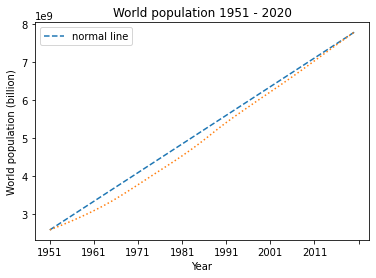

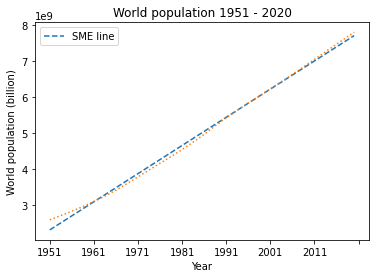

In [73]:
def plot_chart(population, title, a, b, SME1, SME2, first_year):
    normal_line = pd.DataFrame([a*x+b for x in range(first_year,2021)])
    SME_line = pd.DataFrame([SME1*x+SME2 for x in range(first_year,2021)])

    population.columns=['raw data']

    #Draw the normal line: The line connecting the pair of world population numbers corresponding to <first_year> and 2020
    normal_line.columns=['normal line']
    normal_line.plot(style='--', label= "normal line")
    ax= population.plot(style=':', title = title, label= "raw")
    ax.set_xlabel("Year")
    ax.set_ylabel("World population (billion)")

    #Draw the SME line: The line that results the minimum MSE from <first_year> to 2020
    SME_line.columns=['SME line']
    SME_line.plot(style='--', label= "SME line")
    bx= population.plot(style=':', title = title, label= "World population")
    bx.set_xlabel("Year")
    bx.set_ylabel("World population (billion)")

plot_chart(data['population'], "World population 1951 - 2020",a_1,b_1, a_1951, b_1951, 1951)

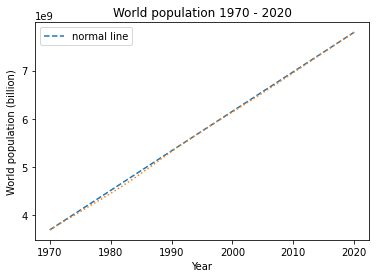

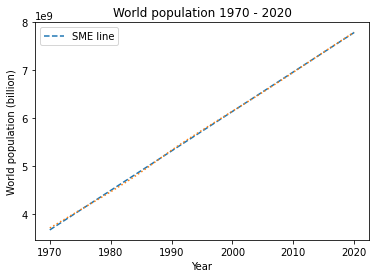

In [74]:
plot_chart(data_1970['population'], "World population 1970 - 2020",a_2,b_2, a_1970, b_1970, 1970)

### Exercise 5: Interpret the obtained results and make any observations based on the results

- Base on some finding:
    - In case from 1951 to 2020, <SME of The line use MSE method> ~= 1/5 <SME of The line don't use MSE method>
    - In case from 1970 to 2020, <SME of The line use MSE method> ~= 1/3 <SME of The line don't use MSE method>
  -> We can use SME to find the closed-form mathematical expressions
- When we optimize, we don't need to run all case to find the minimum value, we can use mathematics knowledge to solve them. In this exercise we can use derivative to find the minimum a and b, don't need to run all case a and b.
- In the shorter time, we can find the closer equation to raw data: line in 1970-2020 closer than line in 1951-2020